# Continuous Probability Distribution- Challenge

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

Task-1:

Consider that the average American monthly household celldar phone bill is USD70. Let's say, the local monthly ho old cell phone bills are distributed normally with a standard deviation of USD11.35.1.

In [107]:
mean=70
std=11.35

a. What is the probability of a randomly selected monthly cell phone bill amounting between USD55 and USD80?

In [108]:
x1=55
x2=80
z1=(x1-mean)/std
z2=(x2-mean)/std

In [13]:
p1=st.norm.cdf(z1)
p2=st.norm.cdf(z2)
print('Probability of a randomly selected monthly cell phone bill amounting between USD55 and USD80 is : ',p2-p1)

Probability of a randomly selected monthly cell phone bill amounting between USD55 and USD80 is :  0.7177035479448073


b. What is the probability that a randomly selected monthly cell phone bill amounts to no more than USD40?

In [109]:
x3=40
z3=(x3-mean)/std
p3=st.norm.cdf(z3)
print('probability that a randomly selected monthly cell phone bill amounts to no more than USD40 is ',p3)

probability that a randomly selected monthly cell phone bill amounts to no more than USD40 is  0.004106667373140424


Task-2

Larsen is a data science intern at Logical Increments. The manager of a car riding app company wants to launch an environment supporting a high-end car riding experience among its customers. He assigns this task to Larsen. Larsen starts analyzing the data on car riding in New York City.

The manager analyzes the list of checkpoints in ride fare amounts, after which Larsen makes the following list of tasks to help the manager.

a. Extract data from the car_riding dataset.

In [110]:
df=pd.read_csv('DS1_C5_S5_SmartCarRiding_Data_Practice.csv')

b. Perform outlier treatment on the fare_amount' attribute of the dataset with data imputation by setting the average value of the fare amounts.

In [17]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [111]:
Q1=np.quantile(df['fare_amount'],0.25)
Q3=np.quantile(df['fare_amount'],0.75)
IQR=Q3-Q1
UF=Q3+(1.5*IQR)
LF=Q1-(1.5*IQR)
m=df['fare_amount'].mean()
c=0
for i in df['fare_amount']:
    if i>UF or i<LF:
        c+=1
print('No of Outliers : ',c)

No of Outliers :  17167


In [114]:
for i in df['fare_amount']:
    if i>UF or i<LF:
        df['fare_amount'].replace(to_replace=i,value=m,inplace=True)

In [116]:
c=0
for i in df['fare_amount']:
    if i>UF or i<LF:
        c+=1
print('No of Outliers : ',c)

No of Outliers :  0


c. Draw different distribution plots for the sample sizes of 10, 30, 1000, 5000, 10000, 50000, 100000, and 150000

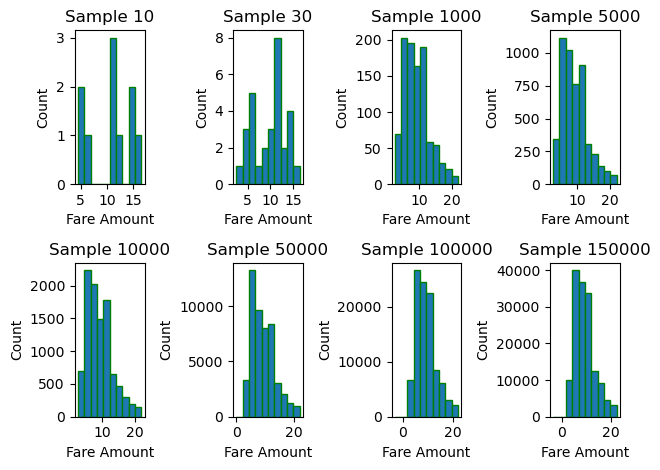

In [105]:
l=[10,30,1000,5000,10000,50000,100000,150000]
j=1
for i in l:
    plt.subplot(2,4,j)
    data=df['fare_amount'].sample(i,random_state=100)
    plt.hist(data,edgecolor='g')
    plt.tight_layout()
    plt.title('Sample '+str(i))
    plt.xlabel('Fare Amount')
    plt.ylabel('Count')
    j=j+1

d. Extract sample data using random sampling with replacement technique. (Make sure that th minimum sample size is greater or equal to 200).

In [62]:
sam_200=df.sample(200,replace=True).sort_index()
sam_200.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
73,48832443,2011-12-10 01:43:00.00000045,5.700000,2011-12-10 01:43:00 UTC,-73.990968,40.727570,-73.991370,40.744720,1
994,7354938,2013-09-20 14:15:00.00000089,13.000000,2013-09-20 14:15:00 UTC,-73.979567,40.743797,-73.947893,40.774767,1
1347,19284487,2009-09-28 18:17:42.0000007,6.500000,2009-09-28 18:17:42 UTC,-73.989438,40.735868,-73.984241,40.724892,1
1954,52882013,2014-11-21 06:52:10.0000001,11.359955,2014-11-21 06:52:10 UTC,-73.984297,40.737256,-73.784297,40.643421,1
2428,35518962,2013-08-18 22:28:04.0000001,11.359955,2013-08-18 22:28:04 UTC,-73.872978,40.774141,-74.010477,40.710936,2


e.Calculate the central tendency and dispersion for the sample and population data to check if they are equal and justify the samples that follow the central limit theorem

In [100]:
pop_size=df['fare_amount'].size
pop_mean=df['fare_amount'].mean()
pop_std=df['fare_amount'].std()

In [101]:
data=pd.DataFrame()

In [102]:
data['Measures']=['Size','Mean','Standard Deviation']
data['Population']=[pop_size,pop_mean,pop_std]

In [103]:
l=[10,30,1000,5000,10000,50000,100000,150000]
for i in l:
    d=df['fare_amount'].sample(i,random_state=100)
    for j in range(0,len(l),1):
        l1=[]
        l1.append(d.size)
        l1.append(d.mean())
        l1.append(d.std())
        data['Sample '+str(i)]=l1
data

,Measures,Population,Sample 10,Sample 30,Sample 1000,Sample 5000,Sample 10000,Sample 50000,Sample 100000,Sample 150000
0,Size,200000.000000,10.000000,30.000000,1000.000000,5000.000000,10000.000000,50000.000000,100000.000000,150000.000000
1,Mean,9.147804,10.595996,9.703997,9.188806,9.047390,9.090762,9.161835,9.153741,9.146265
2,Standard Deviation,4.019032,4.257508,3.810830,3.947187,3.964865,4.019863,4.024918,4.023250,4.018607


In [ ]:
# Mean and standard deviation of population and sample 150000,sample 100000 & sample 50000 is approximately equal.Hence they follows central llimit theorem